# 焊缝区域提取

In [118]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
path = 'data/001.jpg'

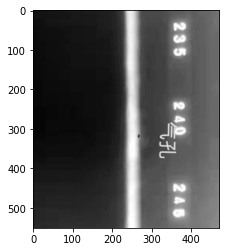

In [123]:
# 载入灰度图
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
height, width = img.shape[0], img.shape[1]

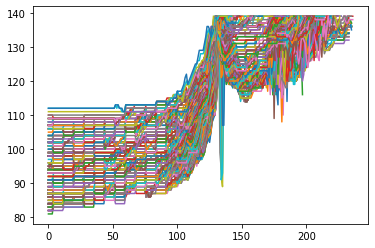

In [124]:
# 按行看它的灰度分布图, 可以看到这张图主要是有两个波峰，以及许多的零散的斑点
for i in range(height):
    line = img[i,100:-100] # 去掉左右两边的行
    plt.plot(line[np.logical_and(line>60, line<140)]) # 行灰度分布图
# plt.plot(img[20,:]) # 行灰度分布图

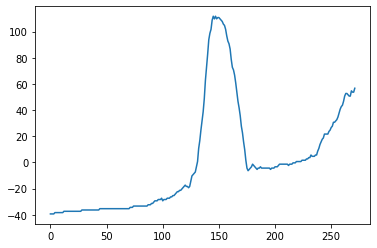

In [126]:
# 单独一行
line = img[500, 100:-100]
plt.plot(line - np.mean(line))
# plt.plot([np.mean(line)]*len(line))

155


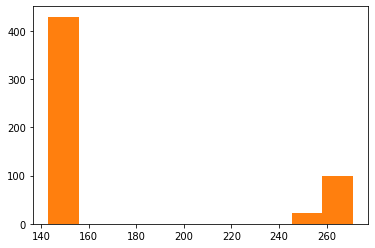

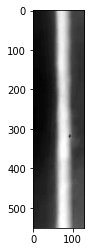

In [132]:
# 从图中我们实际上是知道右边的这个波峰，应该是数字造成的，中间的波峰才是焊缝的位置
# 但是对于某些图来说，其实左边也有可能有波峰，例如左边也出现了数字

line = img[20, 100:-100] # 去掉左右两边的边缘，因为可能有特别暗或者特别亮的情况

# 查找波谷
line_lowest = []
for i in range(height): # 一行行统计
    line = img[i, 100:-100]
    line_lowest.append(np.argmax(line)) # 统计最小的位置

# plt.plot(line_lowest)
plt.hist(line_lowest)
sum, pos, patches = plt.hist(line_lowest)
pos = pos[1:]
center = int(pos[sum==np.max(sum)])
print(center)
plt.figure()
img2 = img[:, 100:-100] # 裁剪掉两边后图像
img3 = img2[:, center-80:center+50] # 裁剪出焊缝及附近区域
plt.imshow(img3, cmap='gray')



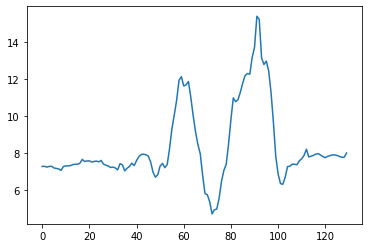

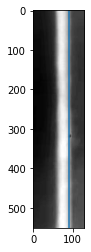

In [140]:
height2, width2 = img3.shape[0], img3.shape[1]

stds = []
for j in range(width2):
    column = img3[:, j]
    stds.append(np.std(column))
plt.plot(stds)

maxstdpos = np.argmax(stds)

plt.figure()
plt.imshow(img3, cmap='gray')
plt.plot([maxstdpos]*height2, np.arange(height2))

# ax = plt.axes(projection='3d')
# x = np.arange(width2)
# y = np.arange(height2)
# X, Y = np.meshgrid(x, y)
# Z = img3
# ax.plot_wireframe(X, Y, Z, color='black')
# plt.plot()


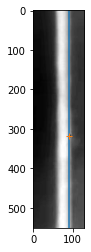

In [142]:
column_err = img3[:, maxstdpos]
widthpos = np.argmin(column_err)
plt.figure()
plt.imshow(img3, cmap='gray')
plt.plot([maxstdpos]*height2, np.arange(height2))
plt.plot([maxstdpos], [widthpos], '+')